In [2]:
import pandas as pd
df=pd.read_csv('./data/neurips.csv')

In [3]:
df.nunique()

year          11
title       3920
abstract    3918
dtype: int64

In [3]:
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [4]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
cv=TfidfVectorizer(stop_words='english', max_features=2000)

In [7]:
x=cv.fit_transform(df.abstract)

In [8]:
words=cv.get_feature_names()

### 차원축소

In [9]:
from sklearn.decomposition import TruncatedSVD

In [10]:
x.shape

(3920, 2000)

In [62]:
#몇개의 주제(차원)으로 나눌것인지[n_components]

In [11]:
svd = TruncatedSVD(n_components=100, random_state=1234)

In [12]:
svd.fit(x)

TruncatedSVD(n_components=100, random_state=1234)

In [13]:
#문서와 차원이 어떤 관계인가, 차원과 단어가 어떤 관계인가 이렇게 두개로 나눠져있다.
#차원과 단어의 관계
svd.components_.shape, svd.components_
#한 주제(차원)에 대한 그 단어의 가중치들

((100, 2000),
 array([[ 0.00483864,  0.01243762,  0.004755  , ...,  0.00491457,
          0.0162017 ,  0.01160996],
        [-0.0055402 , -0.01859974, -0.00681511, ...,  0.00074343,
          0.0014955 ,  0.00839796],
        [-0.00331551, -0.02285996, -0.00537686, ..., -0.00103497,
          0.00135762, -0.00786135],
        ...,
        [-0.00037104,  0.02843677,  0.00591093, ...,  0.0027189 ,
          0.01184353, -0.01022713],
        [ 0.00286079, -0.02232737, -0.00742612, ...,  0.00374566,
         -0.00553911, -0.00644252],
        [ 0.00840489,  0.00073834,  0.00954845, ..., -0.00397496,
         -0.00763423, -0.00401217]]))

In [14]:
#topic 이라는 단어가 각 주제(차원)과 어떤 관계를 맻고 있는지 확인하는 코드
word_idx=words.index('topic')
word_idx

1861

(array([ 2.21636837e-02, -3.35006049e-02,  6.34481186e-02, -9.08255574e-03,
        -2.59052356e-02, -3.04093871e-02,  4.31240860e-02, -4.44698174e-02,
        -5.35017435e-02,  2.51650395e-02, -7.43829615e-02, -4.09887607e-02,
         1.43222364e-03,  9.13531186e-02, -5.15778667e-02,  1.43561806e-02,
         1.43079857e-02,  1.08711712e-01, -1.99153193e-02,  9.44076667e-02,
        -1.49543745e-01,  7.67068611e-02, -9.41560593e-02,  1.36303047e-02,
        -4.61174101e-02,  1.04014531e-01,  1.14117206e-01,  1.99617317e-01,
         3.19722162e-02,  6.47920314e-02, -9.24920865e-02,  2.24452596e-02,
         1.25802356e-02,  1.57600255e-02,  3.03693389e-02, -1.57972126e-01,
        -6.85859397e-02, -2.71583590e-02, -4.23475068e-02,  6.59471303e-03,
        -7.82198356e-02,  6.56273694e-02,  1.66759836e-02,  5.84677258e-02,
         1.36793675e-02, -4.11903979e-02,  2.94849115e-02, -2.23744287e-02,
        -7.98992089e-02,  7.03076161e-02, -8.41267895e-02, -9.61470800e-02,
        -6.7

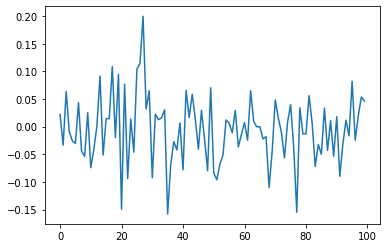

In [15]:
#topic 에 대한 주제별 관련성을 수치로 나타나 있는 것
from matplotlib import pyplot
svd.components_[:,word_idx],pyplot.plot(svd.components_[:,word_idx])

In [16]:
#가장 큰 값이 있는 위치를 알려줌- 27번째 주제가 topic 이라는 단어와 가장 관련이 깊은 주제이다.
topic_idx=svd.components_[:,word_idx].argmax()
topic_idx

27

In [17]:
# 주제와 단어가 관련된 정도를 나타내는 것이 loading 이다.
# topic_idx(27)번째 주제에서의 단어들 가중치를 보는 것.
# tail을 하여 그 주제에 관련성이 높은 단어를 뽑은 것이다
topic=pd.DataFrame({'word': words, 'loading':svd.components_[topic_idx]})
topic.sort_values('loading').tail()

,word,loading
1202,norm,0.119621
804,graph,0.126101
866,image,0.155490
1861,topic,0.199617
1713,sparse,0.211411


In [40]:
# 병렬분석 많이 사용하지만 정답은 아니다.
# 원래 x 랑 비슷하게 생긴 데이터를 랜덤하게 만든다
# 똑같이 svd 로 돌린다. 두개가 있다 진짜와 가짜
# random한거를 차원을 줄이면 결과가 이상할 것이다 그것보다 나아지는 지점
# 거기까지만 줄일것이다.

In [18]:
import numpy as np

In [19]:
nrow, ncol=x.shape

In [20]:
def resample(a):
    return np.random.choice(a, size=nrow)

np.random.seed(2999)
d= np.apply_along_axis(resample, 0, x.A)
# d 는 x와 형태는 같지만 내부 구성이 랜덤하게 섞였음

In [21]:
d.shape

(3920, 2000)

In [22]:
svd2=TruncatedSVD(n_components=100, random_state=1234)
svd2.fit(d)

TruncatedSVD(n_components=100, random_state=1234)

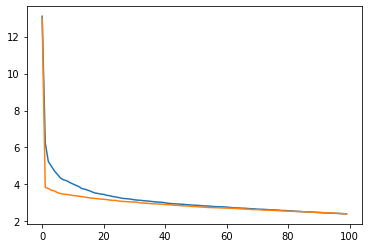

In [23]:
pyplot.plot(svd.singular_values_)
pyplot.plot(svd2.singular_values_)
# 각각의 차원(주제)가 가지는 중요성
# 중요성이 떨어지고 있는 것으로 볼 수 있다
# 파란선이 원래 x, 주황선은 마구잡이 d
# 앞부분 차원은 원래 데이터(x)가 설명하는 것이 많다.
# 점점 교차하면서 파란선이 주황선 밑으로 간다. 
# 두 선이 만난다는 것은 원본과 망가진 데이터와 설명력이 비슷하다는 것, 그만큼 사용하기 좀 그렇다는 것이다.
# 만나는 지점 전까지의 주제(차원)을 사용해야한다는 것

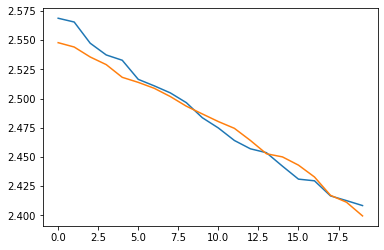

In [24]:
pyplot.plot(svd.singular_values_[80:])
pyplot.plot(svd2.singular_values_[80:])

In [25]:
#원본 데이터의 설명력이 같거나 작아지는 지점이 있다 그부분을 찾자.
svd.singular_values_-svd2.singular_values_ <=0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False])

In [26]:
np.argwhere(svd.singular_values_-svd2.singular_values_ <=0)[0]
#89차원까지만 필요한 것이다

array([89], dtype=int64)

In [27]:
svd.singular_values_[89:]

array([2.48368642, 2.47491023, 2.46421356, 2.4570728 , 2.45375165,
       2.44221647, 2.43110119, 2.42967012, 2.41676355, 2.41270059,
       2.40846582])

In [28]:
svd.singular_values_.shape
# 89번째에서 잘라서 쓰면 된다
# 간격이 안따라 잡힌다면 주제의 갯수를 늘려주면 된다.

(100,)

나의 생각은 위에서 겹치는 지점이 89번째였다. 그래서 그 전가지만 살려서 쓰는게 좋을것 같다고 하셨고\
그러면 그렇게 바꾼 뒤에 밑에 있는 회전을 사용하면은 더 효과가 좋지 않을까 생각이 든다.

### 회전

In [70]:
#!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40383 sha256=099b15cafaf81022f89b7bd402bcc84da906e7eb7e8e5431475348c4b0729969
  Stored in directory: c:\users\jangseonghyun\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


In [29]:
from factor_analyzer.rotator import Rotator

In [30]:
rotator=Rotator()

In [31]:
rot=rotator.fit_transform(svd.components_.T)
#단어가 행방향, 열이 주제가 되도록 해야한다
#회전과 별개의 것이다.

In [32]:
loading = rot.T
#다시 원래 svd 로 돌려준다. rotator를 실행하기 위해서는 T 를 해주어야한다

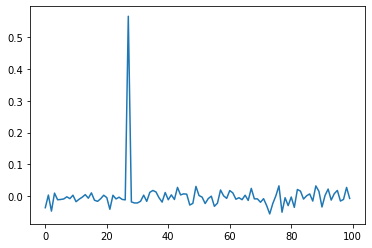

In [33]:
pyplot.plot(loading[:,word_idx])
#회전을 시켜주면 특정 주제로 설명력을 확 몰아준다 
#해석하기가 훨씬 쉬워진다.

In [34]:
topic_idx=loading[:,word_idx].argmax()
topic_idx

27

In [35]:
topic=pd.DataFrame({'word': words, 'loading':loading[topic_idx]})
topic.sort_values('loading').tail(10)
#27번 주제와 가장 관련된 내용은 topic, topics 이렇게 비슷한 것들이 모이게 된다.

,word,loading
1842,text,0.121777
999,latent,0.157819
520,dirichlet,0.187826
540,document,0.192213
1987,word,0.208114
1988,words,0.215588
1003,lda,0.224917
541,documents,0.225140
1862,topics,0.273106
1861,topic,0.566290


이제 27번 주제가 어떤 문서에서 높은 연관성을 보인다고 가정한다면\
위의 단어들은 다 같이 그 문서와 높은 관련성을 본다고 할 수 있다.\
낮다면 단어들 또한 낮아진다. 이것이 주제분석이다.

In [36]:
doc_topics=svd.transform(x)

In [37]:
doc_topics = doc_topics @ rotator.rotation_
# @ 는 행렬의 곱을 나타내고 회전행렬과의 곱을 구하기 위한 것이다.

In [38]:
# 문서별로 27번(topic_idx) 주제를 얼마나 포함하고 있는지를 보기 위한 것
doc_topics[:,topic_idx]

array([ 0.04513653, -0.02398903,  0.02458688, ...,  0.01771896,
       -0.01505735,  0.03134085])

In [39]:
# 연도별로 27번 주제를 얼마나 포함하고 있는지 보기
year_topic=pd.DataFrame({'year': df.year, 'topic': doc_topics[:,topic_idx]})

In [40]:
#시간이 지날수록 27번 주제에 대한 관심도가 낮아지고 있다고 판단된다.
year_topic.groupby('year').agg('mean')

#제품별로 어떤 주제를 많이 사용하는지 고를 수도 있다.

,topic
year,
2007,0.025189
2008,0.016155
2009,0.019187
2010,0.013317
2011,0.010558
2012,0.016707
2013,0.015346
2014,0.014001
2015,0.009028


다른 단어로 분석\
이 단어가 가장 영향력있는 주제를 찾고\
그 주제가 영향력있는 문서를 찾는다

In [41]:
word_idx=words.index('deep')

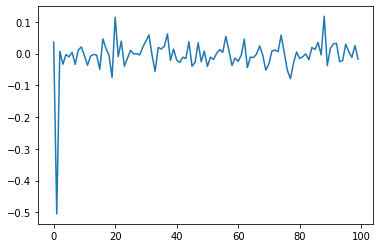

In [44]:
pyplot.plot(loading[:,word_idx])
#회전을 시켜주면 특정 주제로 설명력을 확 몰아준다 
#해석하기가 훨씬 쉬워진다.

In [45]:
#가장 관련있는 주제가 음수쪽이기 때문에 argmin으로
topic_idx=loading[:,word_idx].argmin()
topic_idx

1

In [46]:
topic=pd.DataFrame({'word': words, 'loading':loading[topic_idx]})
#가장 관련있는 주제가 음수쪽이기 때문에 head 로
topic.sort_values('loading').head(10)
#1번 주제와 가장 관련된 내용은 deep, layer, networks, neural 등이다
#딥러닝에 관련된 주제라는 것을 알 수 있다.

,word,loading
450,deep,-0.505157
1001,layer,-0.283529
1002,layers,-0.217273
1184,networks,-0.215860
397,convolutional,-0.190170
1185,neural,-0.165311
1483,recognition,-0.131614
1872,trained,-0.110204
105,architecture,-0.109013
106,architectures,-0.106676


In [47]:
# 연도별로 1번 주제를 얼마나 포함하고 있는지 보기
year_topic=pd.DataFrame({'year': df.year, 'topic': doc_topics[:,topic_idx]})

In [48]:
#시간이 지날수록 1번 주제에 대한 관심도가 높아지고 있다고 판단된다.
year_topic.groupby('year').agg('mean')

,topic
year,
2007,-0.016888
2008,-0.013269
2009,-0.013078
2010,-0.016361
2011,-0.009583
2012,-0.016532
2013,-0.016087
2014,-0.028141
2015,-0.031285


In [49]:
#문서를 분류하는데 주제분석을 쓴다던가
#상품을 추천하는데 쓴다던가

### NMF 실습

In [50]:
# 해석이 쉽다는 장점이 있다.

In [51]:
from sklearn.decomposition import NMF

In [52]:
# svd 는 차원이 달라도 크게 결과가 다르지 않지만
# nmf 는 차원이 다르면 결과도 다르게 나타난다.
# 위의 학습에서 배운 것 처럼 89까지가 적절하기에 89만큼 주제를 나눈다.
nmf=NMF(n_components=89, random_state=1234)
doc_topics=nmf.fit_transform(x)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [53]:
loading= nmf.components_

In [54]:
word_idx=words.index('topic')

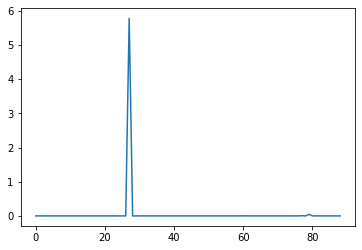

In [57]:
pyplot.plot(loading[:, word_idx])
# 회전을 시켜주지 않아도 알아서 찾아준다.

In [58]:
topic_idx=loading[:,word_idx].argmax()
topic_idx

27

In [59]:
topic=pd.DataFrame({'word':words,'loading':loading[topic_idx]})
topic.sort_values('loading').tail(10)

,word,loading
1138,modeling,0.577834
1842,text,0.816866
64,allocation,0.995832
1988,words,1.225253
540,document,1.435367
520,dirichlet,1.626153
541,documents,1.919543
1003,lda,2.077631
1862,topics,2.810796
1861,topic,5.789769


In [60]:
# 연도별로 1번 주제를 얼마나 포함하고 있는지 보기
year_topic=pd.DataFrame({'year': df.year, 'topic': doc_topics[:,topic_idx]})

In [61]:
#시간이 지날수록 1번 주제에 대한 관심도가 높아지고 있다고 판단된다.
year_topic.groupby('year').agg('mean')

,topic
year,
2007,0.002231
2008,0.001294
2009,0.001785
2010,0.001217
2011,0.001194
2012,0.001699
2013,0.001276
2014,0.001205
2015,0.000814


In [62]:
word_idx=words.index('deep')

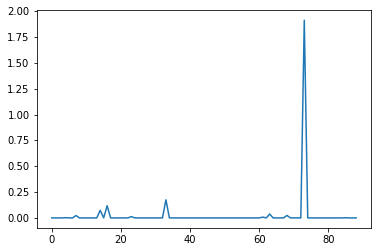

In [63]:
pyplot.plot(loading[:, word_idx])
# 회전을 시켜주지 않아도 알아서 찾아준다.

In [64]:
topic_idx=loading[:,word_idx].argmax()
topic_idx

73

In [65]:
topic=pd.DataFrame({'word':words,'loading':loading[topic_idx]})
topic.sort_values('loading').tail(10)

,word,loading
1872,trained,0.230900
1483,recognition,0.250119
834,hidden,0.260007
1541,representations,0.265281
397,convolutional,0.274323
106,architectures,0.329308
105,architecture,0.336127
1002,layers,0.707754
1001,layer,0.866000
450,deep,1.911767


In [66]:
# 연도별로 1번 주제를 얼마나 포함하고 있는지 보기
year_topic=pd.DataFrame({'year': df.year, 'topic': doc_topics[:,topic_idx]})

In [67]:
#시간이 지날수록 1번 주제에 대한 관심도가 높아지고 있다고 판단된다.
year_topic.groupby('year').agg('mean')

,topic
year,
2007,0.004420
2008,0.001310
2009,0.002862
2010,0.003458
2011,0.002289
2012,0.003851
2013,0.003451
2014,0.006174
2015,0.007276
